<a href="https://colab.research.google.com/github/therealcyberlord/tensorflow_keras_stock_prediction/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from google.colab import drive
# ignore drive.mount() if you are not using colab 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
import pandas as pd
stock_file = open('/content/gdrive/My Drive/Machine_learning/GOOG.csv', 'rb')
stock_data = pd.read_csv(stock_file)

Read the stock data

In [25]:
stock_data.dropna(inplace=True)
stock_data.drop('Adj Close', axis=1, inplace=True)
stock_data.head()

,Date,Open,High,Low,Volume,Close
0,2018-08-02,1205.900024,1229.880005,1204.790039,1531300,1226.150024
1,2018-08-03,1229.619995,1230.000000,1215.060059,1089600,1223.709961
2,2018-08-06,1225.000000,1226.088013,1215.796997,1081700,1224.770020
3,2018-08-07,1237.000000,1251.170044,1236.170044,1494000,1242.219971
4,2018-08-08,1240.469971,1256.500000,1238.008057,1370300,1245.609985


In [26]:
stock_data.shape

(251, 6)

Drops the adjusted close column and remove all the null values

In [27]:
stock_data.set_index('Date', inplace=True)
stock_data.head()

,Open,High,Low,Volume,Close
Date,,,,,
2018-08-02,1205.900024,1229.880005,1204.790039,1531300,1226.150024
2018-08-03,1229.619995,1230.000000,1215.060059,1089600,1223.709961
2018-08-06,1225.000000,1226.088013,1215.796997,1081700,1224.770020
2018-08-07,1237.000000,1251.170044,1236.170044,1494000,1242.219971
2018-08-08,1240.469971,1256.500000,1238.008057,1370300,1245.609985


Set date as index

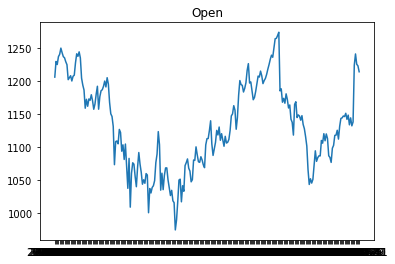

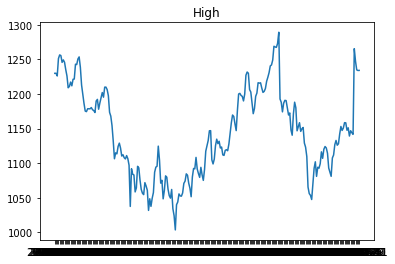

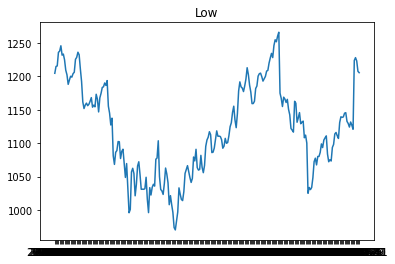

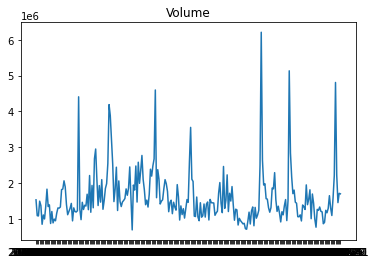

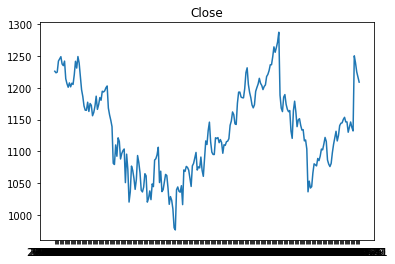

In [28]:
import matplotlib.pyplot as plt 

plt.plot(stock_data['Open'])
plt.title('Open')
plt.show()
plt.plot(stock_data['High'])
plt.title('High')
plt.show()
plt.plot(stock_data['Low'])
plt.title('Low')
plt.show()
plt.plot(stock_data['Volume'])
plt.title('Volume')
plt.show()
plt.plot(stock_data['Close'])
plt.title('Close')
plt.show()

Visualize the graphs

In [29]:
times = sorted(stock_data.index.values)

Sort the data by order of the index => sequential

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(stock_data, train_size=0.9, test_size=0.1, shuffle=False)

Split data into train and test

In [9]:
v = df_train.loc[:].values
min_max_scaler = MinMaxScaler()
df_train = min_max_scaler.fit_transform(v)
df_test = min_max_scaler.transform(df_test.loc[:].values)

scales the data between 0 and 1

In [10]:
import numpy as np
from collections import deque

def time_series(arr):
  limit = 10
  sequential_data = []
  prev_days = deque(maxlen=limit)
  for i in arr:
    prev_days.append([n for n in i[:-1]]) # store all but the labels
    if len(prev_days) == limit:
      sequential_data.append([np.array(prev_days), i[-1]]) # append the labels
  return sequential_data

Add timestamp to the data since a recurrent network takes 3 dimensions

In [11]:
df_train = time_series(df_train)
df_test = time_series(df_test)

X_train = []
y_train = []
X_test = []
y_test = []

for feature, label in df_train:
  X_train.append(feature)
  y_train.append(label)
for feature, label in df_test:
  X_test.append(feature)
  y_test.append(label)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Further split the training and testing dataset into X_train, y_train, X_test, y_test

In [14]:
pip install keras

In [19]:
import tensorflow as tf
from tensorflow import keras 
#from tensorflow.keras.layers import Dense, CuDNNLSTM, Dropout, BatchNormalization 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
from keras.utils import Sequence
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

Constructs the RNN, I am using CuDNNLSTM for a faster performance

In [20]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:])))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
early_stop = EarlyStopping(monitor='loss', patience=10)
model.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['mse', 'mae'])
model.fit(X_train, y_train, epochs=300, batch_size=12, callbacks=[early_stop])

Epoch 1/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1152
Epoch 2/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0166 - mse: 0.0166 - mae: 0.1041
Epoch 3/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0952
Epoch 4/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0868
Epoch 5/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0923
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0764
Epoch 7/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0753
Epoch 8/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0751
Epoch 9/300
18/18 [==============================] - 0s 6ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0840
Epoch 10/300
18/18 [========

Use the neural network for our stock prediction

1/1 [==============================] - 0s 2ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0527


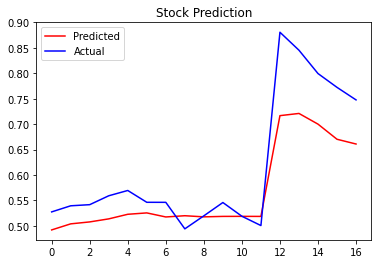

In [21]:
model.evaluate(X_test, y_test)
pred = model.predict(X_test)
plt.plot(pred, 'r')
plt.plot(y_test, 'b')
plt.title('Stock Prediction')
plt.legend(['Predicted', 'Actual'])
plt.show()